In [1]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Number of rows for the dataset
num_rows = 1_000_000

# Generate raw data for the dataset
countries = ['USA', 'India', 'Brazil', 'China', 'Germany', 'Australia', 'South Africa', 'Canada', 'UK', 'Japan']
regions = ['North', 'South', 'East', 'West', 'Central']
store_types = ['Supermarket', 'Grocery Store', 'Wholesale', 'Hypermarket', None]
categories = ['Fruits', 'Vegetables', 'Dairy', 'Meat', 'Snacks', 'Beverages', 'Household', 'Electronics', 'Clothing', None]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
payment_methods = ['Cash', 'Credit Card', 'Mobile Payment', 'Debit Card', None]
bool_options = [True, False, None]

data = {
    'Transaction_ID': [f"T{random.randint(1000000, 9999999)}" for _ in range(num_rows)],
    'Country': [random.choice(countries) for _ in range(num_rows)],
    'Region': [random.choice(regions) for _ in range(num_rows)],
    'Store_Type': [random.choice(store_types) for _ in range(num_rows)],
    'Category': [random.choice(categories) for _ in range(num_rows)],
    'Item_ID': [f"I{random.randint(10000, 99999)}" for _ in range(num_rows)],
    'Quantity': [random.randint(1, 100) if random.random() > 0.1 else None for _ in range(num_rows)],
    'Price_per_Unit': [round(random.uniform(1.0, 500.0), 2) if random.random() > 0.05 else None for _ in range(num_rows)],
    'Total_Sales': [None for _ in range(num_rows)],  # Placeholder for raw data
    'Discount_Applied': [random.choice(bool_options) for _ in range(num_rows)],
    'Day': [random.choice(days) for _ in range(num_rows)],
    'Time_of_Purchase': [f"{random.randint(0, 23)}:{random.randint(0, 59)}" if random.random() > 0.1 else None for _ in range(num_rows)],
    'Payment_Method': [random.choice(payment_methods) for _ in range(num_rows)],
    'Customer_ID': [f"C{random.randint(100000, 999999)}" if random.random() > 0.2 else None for _ in range(num_rows)],
    'Loyalty_Card_Used': [random.choice(bool_options) for _ in range(num_rows)],
    'Employee_ID': [f"E{random.randint(1000, 9999)}" if random.random() > 0.1 else None for _ in range(num_rows)],
    'Feedback_Score': [random.randint(1, 5) if random.random() > 0.3 else None for _ in range(num_rows)],
    'Return': [random.choice(bool_options) for _ in range(num_rows)],
    'Weather': [random.choice(['Sunny', 'Rainy', 'Snowy', 'Cloudy', None]) for _ in range(num_rows)],
    'Holiday': [random.choice(bool_options) for _ in range(num_rows)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Introduce leading/trailing spaces to some columns
df['Country'] = df['Country'].apply(lambda x: f"  {x}  " if random.random() > 0.7 else x)
df['Store_Type'] = df['Store_Type'].apply(lambda x: f"{x}  " if random.random() > 0.5 else x)
df['Category'] = df['Category'].apply(lambda x: f"  {x}" if random.random() > 0.5 else x)

# Add some duplicate rows
df = pd.concat([df, df.sample(frac=0.05)], ignore_index=True)

# Save to CSV
df.to_csv("raw_superstore_data.csv", index=False)
print("Dataset saved as raw_superstore_data.csv")

Dataset saved as raw_superstore_data.csv


# Step 1: Load the Dataset

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("raw_superstore_data.csv")

# Display the first few rows to understand its structure
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,NaN,False,Friday,22:1,Cash,C298340,True,E2761,NaN,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,NaN,NaN,Thursday,2:39,Cash,C467140,False,E6782,4.0,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,NaN,NaN,Sunday,1:2,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,NaN,True,Wednesday,18:38,NaN,C785538,False,E6376,3.0,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,NaN,False,Saturday,8:23,Mobile Payment,NaN,False,E8737,NaN,False,Sunny,False


# Step 2: Check for Missing Values

In [4]:
# Check missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Transaction_ID             0
Country                    0
Region                     0
Store_Type            104726
Category               52815
Item_ID                    0
Quantity              104894
Price_per_Unit         52296
Total_Sales          1050000
Discount_Applied      350216
Day                        0
Time_of_Purchase      105228
Payment_Method        209698
Customer_ID           209819
Loyalty_Card_Used     349698
Employee_ID           104961
Feedback_Score        315275
Return                350336
Weather               210194
Holiday               350303
dtype: int64


# Step 3: Clean Leading and Trailing Spaces

In [5]:
# Remove leading and trailing spaces from specific columns
df['Country'] = df['Country'].str.strip()
df['Store_Type'] = df['Store_Type'].str.strip()
df['Category'] = df['Category'].str.strip()

In [6]:
# shape of dataset
df.shape

(1050000, 20)

# Step 4: Remove Duplicate Rows

In [7]:
# Count duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 50000


# Step 5: Fill Missing Region Based on Country

In [8]:
# Define a region mapping
region_mapping = {
    'USA': 'North',
    'India': 'Central',
    'Brazil': 'South',
    'China': 'East',
    'Germany': 'West',
    'Australia': 'East',
    'South Africa': 'South',
    'Canada': 'North',
    'UK': 'West',
    'Japan': 'East'
}

# Fill missing regions based on country
df['Region'] = df.apply(
    lambda row: region_mapping[row['Country']] if pd.isnull(row['Region']) else row['Region'],
    axis=1
)


# Step 6: Fill Missing Price_per_Unit Based on Category

In [9]:
# Calculate average price for each category
avg_price_per_category = df.groupby('Category')['Price_per_Unit'].mean()

# Manually fill missing prices for a few categories
df.loc[(df['Category'] == 'Fruits') & 
       (df['Price_per_Unit'].isnull()), 
       'Price_per_Unit'] = avg_price_per_category['Fruits']

df.loc[(df['Category'] == 'Vegetables') & 
       (df['Price_per_Unit'].isnull()), 
       'Price_per_Unit'] = avg_price_per_category['Vegetables']

df.loc[(df['Category'] == 'Dairy') & 
       (df['Price_per_Unit'].isnull()), 
       'Price_per_Unit'] = avg_price_per_category['Dairy']
# Repeat similar for other categories

In [10]:
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,NaN,False,Friday,22:1,Cash,C298340,True,E2761,NaN,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,NaN,NaN,Thursday,2:39,Cash,C467140,False,E6782,4.0,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,NaN,NaN,Sunday,1:2,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,NaN,True,Wednesday,18:38,NaN,C785538,False,E6376,3.0,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,NaN,False,Saturday,8:23,Mobile Payment,NaN,False,E8737,NaN,False,Sunny,False


# Step 7: Fill Missing Total_Sales

In [11]:
# Fill Total Sales based on Quantity and Price_per_Unit
df['Total_Sales'] = df['Quantity'] * df['Price_per_Unit']

# Step 8: Fill Missing Store_Type Based on Region

In [14]:
# Find the most common store type in each region
common_store_type_per_region = df.groupby(
    'Region')['Store_Type'].agg(lambda x: x.mode()[0])

# Fill missing Store_Type
df.loc[(df['Region'] == 'North') & 
       (df['Store_Type'].isnull()), 
       'Store_Type'] = common_store_type_per_region['North']

df.loc[(df['Region'] == 'Central') & 
       (df['Store_Type'].isnull()), 
       'Store_Type'] = common_store_type_per_region['Central']

df.loc[(df['Region'] == 'South') & 
       (df['Store_Type'].isnull()), 
       'Store_Type'] = common_store_type_per_region['South']
# Repeat for other regions

# Step 9: Fill Missing Feedback_Score

In [15]:
# Calculate average feedback for each store type
avg_feedback_per_store = df.groupby(
    'Store_Type')['Feedback_Score'].mean()

# Fill missing feedback scores for some store types
df.loc[(df['Store_Type'] == 'Supermarket') &
       (df['Feedback_Score'].isnull()), 
       'Feedback_Score'] = avg_feedback_per_store['Supermarket']

df.loc[(df['Store_Type'] == 'Grocery Store') &
       (df['Feedback_Score'].isnull()), 
       'Feedback_Score'] = avg_feedback_per_store['Grocery Store']
# Repeat for other store types

# Step 10: Fill Missing Payment_Method

In [16]:
# Find the most common payment method for each store type
common_payment_per_store = df.groupby(
    'Store_Type')['Payment_Method'].agg(lambda x: x.mode()[0])

# Fill missing payment methods for some store types
df.loc[(df['Store_Type'] == 'Supermarket') & 
       (df['Payment_Method'].isnull()), 
       'Payment_Method'] = common_payment_per_store['Supermarket']

df.loc[(df['Store_Type'] == 'Grocery Store') &
       (df['Payment_Method'].isnull()), 
       'Payment_Method'] = common_payment_per_store['Grocery Store']
# Repeat for other store types

# Step 11: Verify the Final Dataset

In [17]:
# Check for remaining missing values
missing_values_after = df.isnull().sum()
print(missing_values_after)

Transaction_ID            0
Country                   0
Region                    0
Store_Type            39794
Category              50274
Item_ID                   0
Quantity              99998
Price_per_Unit        35015
Total_Sales          131474
Discount_Applied     333560
Day                       0
Time_of_Purchase     100275
Payment_Method       112283
Customer_ID          199744
Loyalty_Card_Used    333153
Employee_ID           99857
Feedback_Score       168170
Return               333664
Weather              200274
Holiday              333565
dtype: int64


# Step 12: Save the Cleaned Dataset

In [18]:
df.to_csv("cleaned_superstore_data.csv", index=False)
print("Cleaned dataset saved as cleaned_superstore_data.csv")

Cleaned dataset saved as cleaned_superstore_data.csv


# (EDA) Exploratory Data Analysis

In [19]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  object 
 1   Country            1000000 non-null  object 
 2   Region             1000000 non-null  object 
 3   Store_Type         960206 non-null   object 
 4   Category           949726 non-null   object 
 5   Item_ID            1000000 non-null  object 
 6   Quantity           900002 non-null   float64
 7   Price_per_Unit     964985 non-null   float64
 8   Total_Sales        868526 non-null   float64
 9   Discount_Applied   666440 non-null   object 
 10  Day                1000000 non-null  object 
 11  Time_of_Purchase   899725 non-null   object 
 12  Payment_Method     887717 non-null   object 
 13  Customer_ID        800256 non-null   object 
 14  Loyalty_Card_Used  666847 non-null   object 
 15  Employee_ID        900143 non-null   o

In [21]:
# Display summary statistics for numeric columns
df.describe()

,Quantity,Price_per_Unit,Total_Sales,Feedback_Score
count,900002.000000,964985.000000,868526.000000,831830.000000
mean,50.496852,250.293361,12631.797594,2.999659
std,28.872398,142.954474,11001.895288,1.297582
min,1.000000,1.000000,1.010000,1.000000
25%,25.000000,127.540000,3522.490000,2.000000
50%,50.000000,250.160313,9542.085000,3.000000
75%,75.000000,373.200000,19250.255000,4.000000
max,100.000000,500.000000,49992.000000,5.000000


In [22]:
# Calculate percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
Transaction_ID        0.0000
Country               0.0000
Region                0.0000
Store_Type            3.9794
Category              5.0274
Item_ID               0.0000
Quantity              9.9998
Price_per_Unit        3.5015
Total_Sales          13.1474
Discount_Applied     33.3560
Day                   0.0000
Time_of_Purchase     10.0275
Payment_Method       11.2283
Customer_ID          19.9744
Loyalty_Card_Used    33.3153
Employee_ID           9.9857
Feedback_Score       16.8170
Return               33.3664
Weather              20.0274
Holiday              33.3565
dtype: float64


In [23]:
# Calculate mode, median, and mean for Quantity
print("Mode of Quantity:", df['Quantity'].mode()[0])
print("Median of Quantity:", df['Quantity'].median())
print("Mean of Quantity:", df['Quantity'].mean())

# Calculate mode, median, and mean for Price_per_Unit
print("Mode of Price_per_Unit:", df['Price_per_Unit'].mode()[0])
print("Median of Price_per_Unit:", df['Price_per_Unit'].median())
print("Mean of Price_per_Unit:", df['Price_per_Unit'].mean())

Mode of Quantity: 4.0
Median of Quantity: 50.0
Mean of Quantity: 50.49685222921727
Mode of Price_per_Unit: 250.16031268270277
Median of Price_per_Unit: 250.16031268270277
Mean of Price_per_Unit: 250.29336109845693


# Categorical Variables Analysis

In [24]:
# Distribution of Country
# Count transactions by country
country_counts = df['Country'].value_counts()
print("Transactions by country:")
print(country_counts)

Transactions by country:
Country
China           100536
Australia       100379
South Africa    100297
UK              100116
USA             100111
Germany          99973
India            99859
Japan            99684
Brazil           99585
Canada           99460
Name: count, dtype: int64


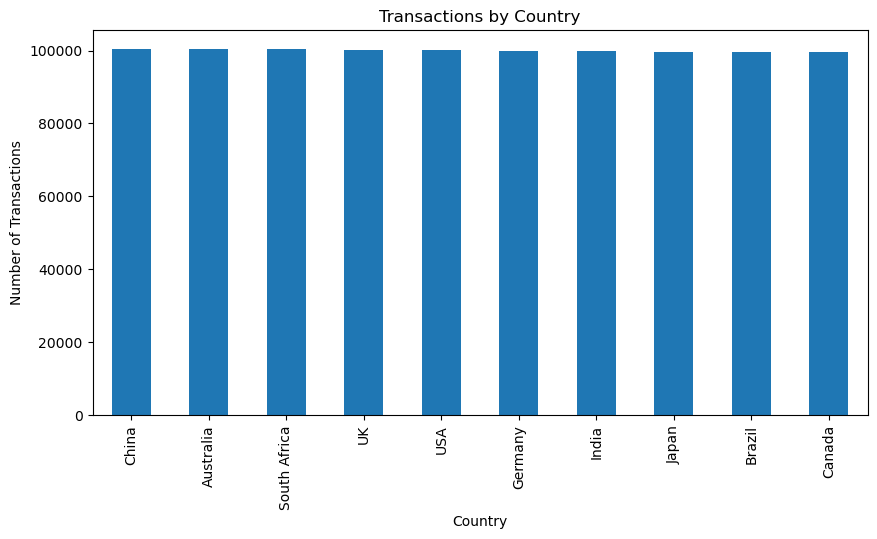

In [26]:
# Plot distribution of transactions by country
import matplotlib.pyplot as plt
country_counts.plot(kind='bar', title="Transactions by Country", figsize=(10, 5))
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.show()

In [27]:
# Count store types
store_type_counts = df['Store_Type'].value_counts()
print("Store type distribution:")
print(store_type_counts)

Store type distribution:
Store_Type
Supermarket      240034
Hypermarket      219857
Grocery Store    200265
Wholesale        199744
None             100306
Name: count, dtype: int64


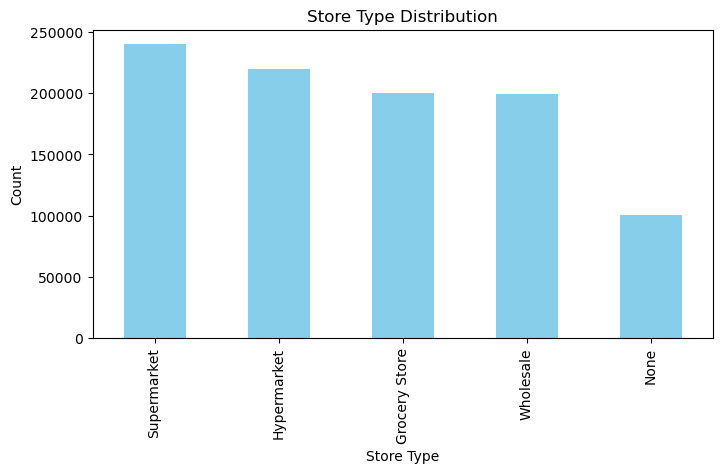

In [28]:
# Plot store type distribution
store_type_counts.plot(kind='bar', title="Store Type Distribution", figsize=(8, 4), color='skyblue')
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

# Numerical Variables Analysis

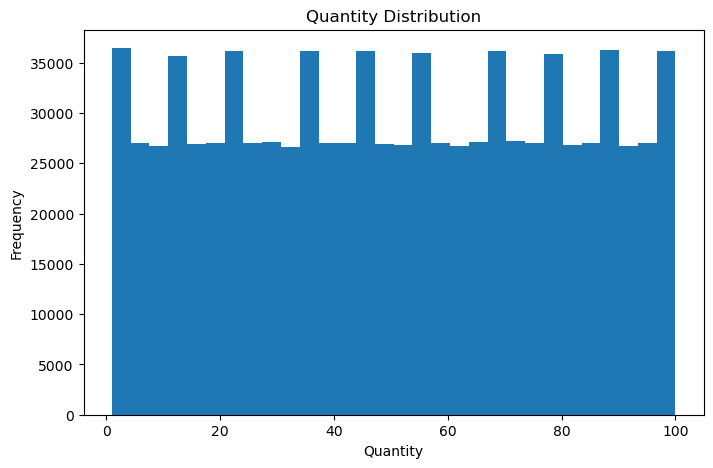

In [29]:
# Plot histogram of Quantity
df['Quantity'].plot(kind='hist', bins=30, title="Quantity Distribution",
                    figsize=(8, 5))
plt.xlabel("Quantity")
plt.show()


# Total Sales Analysis

In [30]:
# Calculate mean and median for Total Sales
print("Mean of Total Sales:", df['Total_Sales'].mean())
print("Median of Total Sales:", df['Total_Sales'].median())

Mean of Total Sales: 12631.797593845693
Median of Total Sales: 9542.085


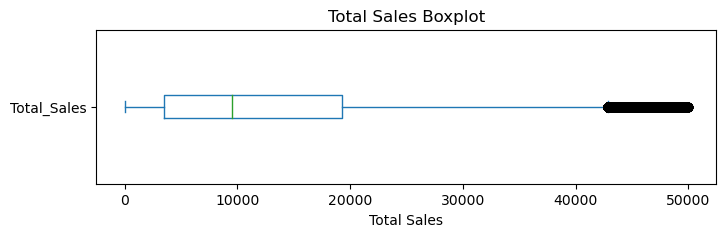

In [31]:
# Plot boxplot of Total Sales
df['Total_Sales'].plot(kind='box', title="Total Sales Boxplot", 
                       vert=False, figsize=(8, 2))
plt.xlabel("Total Sales")
plt.show()

# Relationships Between Variables

In [32]:
# Calculate total sales by category
sales_by_category = df.groupby('Category')['Total_Sales'].sum()
print("Total Sales by Category:")
print(sales_by_category)

Total Sales by Category:
Category
Beverages      1.082478e+09
Clothing       1.077223e+09
Dairy          1.129708e+09
Electronics    1.072048e+09
Fruits         1.144350e+09
Household      1.081643e+09
Meat           1.078938e+09
None           5.376548e+08
Snacks         1.078651e+09
Vegetables     1.146353e+09
Name: Total_Sales, dtype: float64


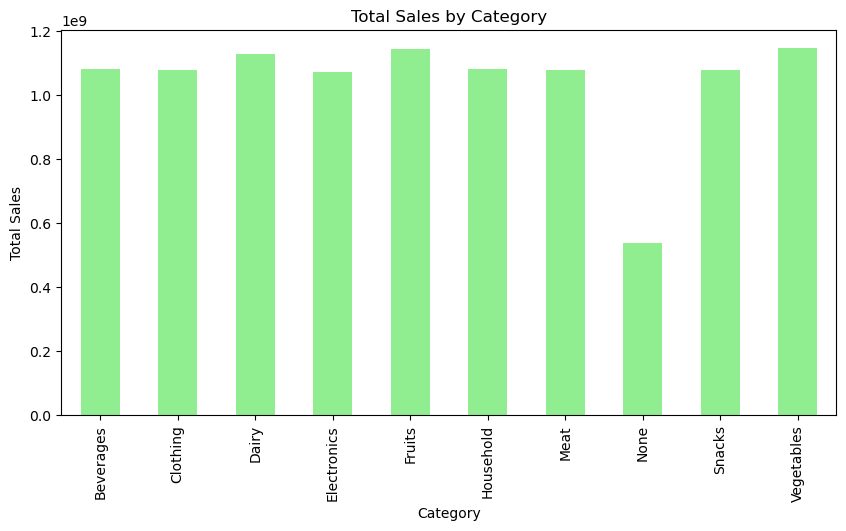

In [33]:
# Plot total sales by category
sales_by_category.plot(kind='bar', title="Total Sales by Category", figsize=(10, 5), color='lightgreen')
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Total Sales by Country

In [34]:
# Calculate total sales by country
sales_by_country = df.groupby('Country')['Total_Sales'].sum()
print("Total Sales by Country:")
print(sales_by_country)

Total Sales by Country:
Country
Australia       1.100620e+09
Brazil          1.092926e+09
Canada          1.094701e+09
China           1.106253e+09
Germany         1.096543e+09
India           1.094453e+09
Japan           1.092407e+09
South Africa    1.098438e+09
UK              1.094401e+09
USA             1.100304e+09
Name: Total_Sales, dtype: float64


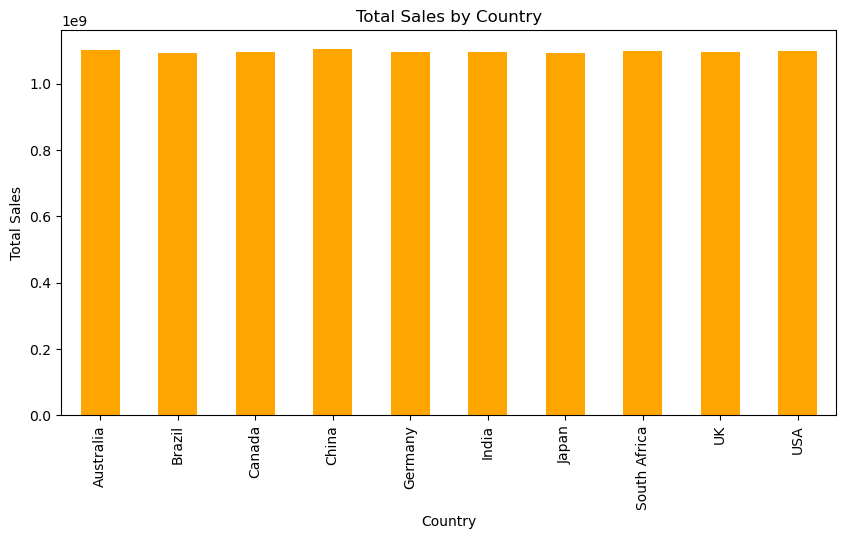

In [35]:
# Plot total sales by country
sales_by_country.plot(kind='bar', title="Total Sales by Country", figsize=(10, 5), color='orange')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()

# Time-Based Analysis

In [36]:
# Transactions by Day
# Count transactions by day
transactions_by_day = df['Day'].value_counts()
print("Transactions by Day:")
print(transactions_by_day)

Transactions by Day:
Day
Thursday     143415
Friday       143320
Saturday     143312
Monday       143082
Sunday       142525
Wednesday    142226
Tuesday      142120
Name: count, dtype: int64


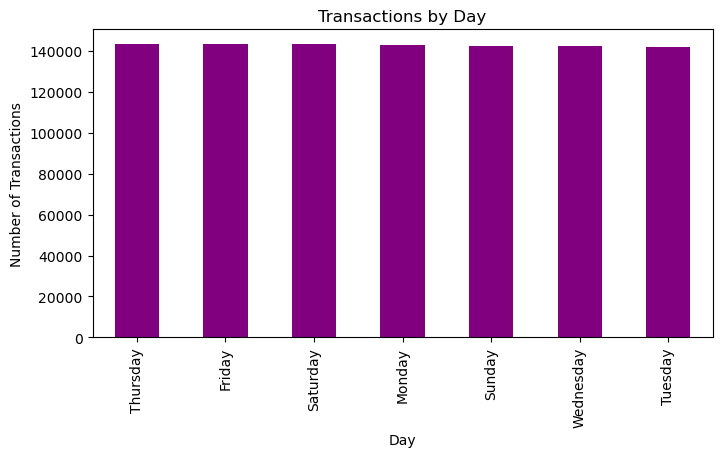

In [37]:
# Plot transactions by day
transactions_by_day.plot(kind='bar', title="Transactions by Day", figsize=(8, 4), color='purple')
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.show()

# Correlation Analysis

In [38]:
# Correlation Between Numerical Variables
# Calculate correlation matrix
correlation_matrix = df[['Quantity', 'Price_per_Unit', 
                         'Total_Sales']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Quantity  Price_per_Unit  Total_Sales
Quantity        1.000000       -0.001408     0.655102
Price_per_Unit -0.001408        1.000000     0.654890
Total_Sales     0.655102        0.654890     1.000000


# Key Insights

In [39]:
# Print key insights
print("Most transactions by country:", country_counts.idxmax())
print("Highest total sales by category:", sales_by_category.idxmax())
print("Country with highest total sales:", sales_by_country.idxmax())
print("Day with most transactions:", transactions_by_day.idxmax())


Most transactions by country: China
Highest total sales by category: Vegetables
Country with highest total sales: China
Day with most transactions: Thursday


# Sales Performance Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  object 
 1   Country            1000000 non-null  object 
 2   Region             1000000 non-null  object 
 3   Store_Type         960206 non-null   object 
 4   Category           949726 non-null   object 
 5   Item_ID            1000000 non-null  object 
 6   Quantity           900002 non-null   float64
 7   Price_per_Unit     964985 non-null   float64
 8   Total_Sales        868526 non-null   float64
 9   Discount_Applied   666440 non-null   object 
 10  Day                1000000 non-null  object 
 11  Time_of_Purchase   899725 non-null   object 
 12  Payment_Method     887717 non-null   object 
 13  Customer_ID        800256 non-null   object 
 14  Loyalty_Card_Used  666847 non-null   object 
 15  Employee_ID        900143 non-null   o

In [43]:
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,14818.23,False,Friday,22:1,Cash,C298340,True,E2761,2.994533,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,31474.64,NaN,Thursday,2:39,Cash,C467140,False,E6782,4.000000,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,8340.08,NaN,Sunday,1:2,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,10786.26,True,Wednesday,18:38,NaN,C785538,False,E6376,3.000000,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,6033.17,False,Saturday,8:23,Mobile Payment,NaN,False,E8737,2.998902,False,Sunny,False


# Price Ranges of Products

In [45]:
# Calculate minimum, maximum, and average price per unit
min_price = df['Price_per_Unit'].min()
max_price = df['Price_per_Unit'].max()
avg_price = df['Price_per_Unit'].mean()

print("Minimum Price:", min_price)
print("Maximum Price:", max_price)
print("Average Price:", avg_price)

Minimum Price: 1.0
Maximum Price: 500.0
Average Price: 250.29336109845693


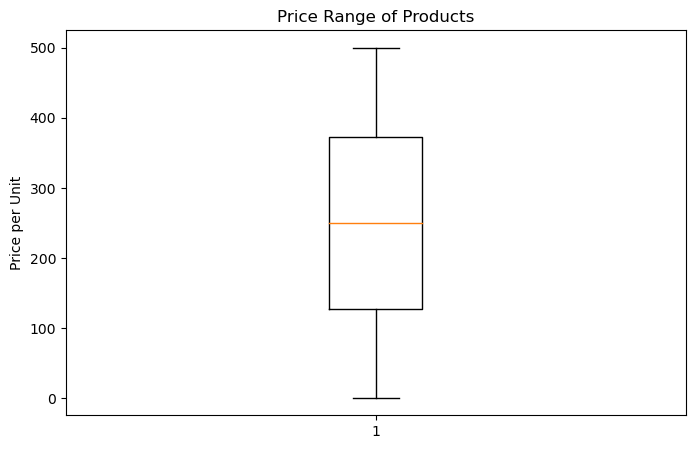

In [46]:
# Plot price range
plt.figure(figsize=(8, 5))
plt.boxplot(df['Price_per_Unit'].dropna())
plt.title("Price Range of Products")
plt.ylabel("Price per Unit")
plt.show()

In [47]:
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,14818.23,False,Friday,22:1,Cash,C298340,True,E2761,2.994533,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,31474.64,NaN,Thursday,2:39,Cash,C467140,False,E6782,4.000000,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,8340.08,NaN,Sunday,1:2,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,10786.26,True,Wednesday,18:38,NaN,C785538,False,E6376,3.000000,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,6033.17,False,Saturday,8:23,Mobile Payment,NaN,False,E8737,2.998902,False,Sunny,False


In [48]:
# Number of Transactions Per Customer Type
# Count transactions by customer type
transactions_by_customer_type = df['Loyalty_Card_Used'].value_counts()
print("Number of transactions by customer type:")
print(transactions_by_customer_type)

Number of transactions by customer type:
Loyalty_Card_Used
False    333824
True     333023
Name: count, dtype: int64


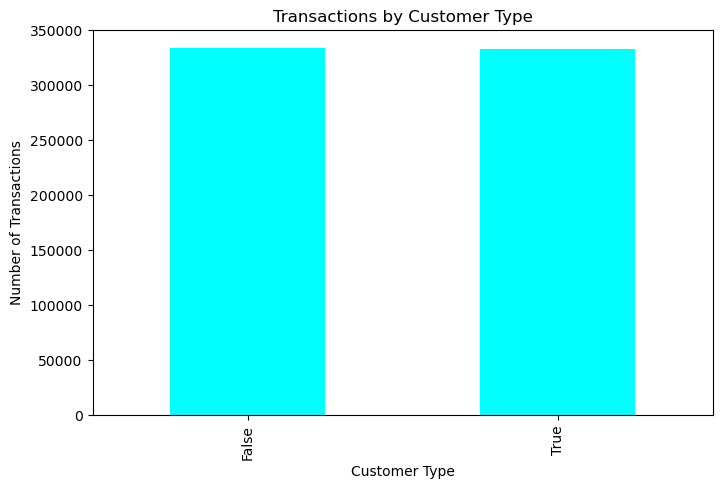

In [49]:
# Plot transactions by customer type
transactions_by_customer_type.plot(kind='bar', title="Transactions by Customer Type", color='cyan', figsize=(8, 5))
plt.xlabel("Customer Type")
plt.ylabel("Number of Transactions")
plt.show()